## Author: S Aparnaa

## Organization:The Sparks Foundation

## Task 2:Prediction using Unsupervised ML

## IMPORTING LIBRARIES AND DATASETS

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


In [6]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(8) # See the first 8 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


In [7]:
x = iris_df.iloc[:,:].values

## Plotting in a line graph

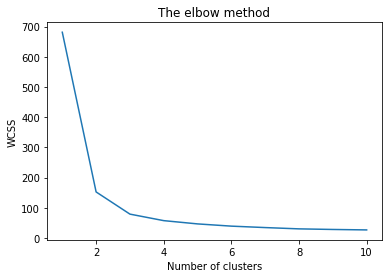

In [8]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

##    thus, value of K here is 3. So the optimum number of cluster for this model is 3.

## Training the model for K = 3


In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
Kmean = KMeans(n_clusters = 3)
ypredict = Kmean.fit_predict(iris_df)

In [10]:

ypredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [11]:

iris_df["Cluster"]  = ypredict

In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Observing the clusters on sepal length and sepal width :

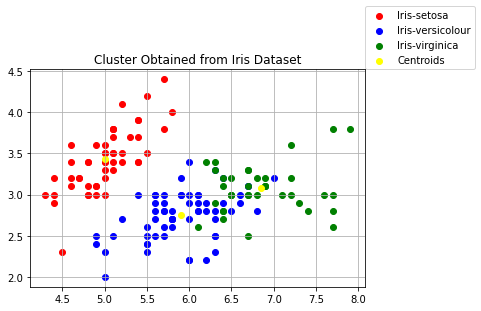

In [13]:
y_Kmeans = Kmean.fit_predict(x)
# Visualising the clusters - On the first two columns
plt.title("Cluster Obtained from Iris Dataset")
plt.scatter(x[y_Kmeans == 0, 0], x[y_Kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_Kmeans == 1, 0], x[y_Kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_Kmeans == 2, 0], x[y_Kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(Kmean.cluster_centers_[:, 0], Kmean.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.grid()
plt.legend(loc=(1,1))

## This concludes the K-Means Workshop